In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [126]:
#read data

data = pd.read_csv("weatherHistory.csv")
data.shape

(96453, 12)

In [127]:
data.columns
data = data.drop(['Formatted Date', 'Summary', 'Precip Type',
       'Apparent Temperature (C)', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'], axis=1)

In [128]:
#getting data types of features
data.dtypes

Temperature (C)    float64
Humidity           float64
dtype: object

In [129]:
data.head()

,Temperature (C),Humidity
0,9.472222,0.89
1,9.355556,0.86
2,9.377778,0.89
3,8.288889,0.83
4,8.755556,0.83


In [130]:
#rename the Temperature column with Temp.
data.rename(columns= {"Temperature (C)": "Temperature"}, inplace=True)

In [131]:
data.describe()

,Temperature,Humidity
count,96453.000000,96453.000000
mean,11.932678,0.734899
std,9.551546,0.195473
min,-21.822222,0.000000
25%,4.688889,0.600000
50%,12.000000,0.780000
75%,18.838889,0.890000
max,39.905556,1.000000


In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 2 columns):
Temperature    96453 non-null float64
Humidity       96453 non-null float64
dtypes: float64(2)
memory usage: 1.5 MB


In [133]:
#converting celcius into farenheit
data['Temperature'] = (data['Temperature'] * 9/5) + 32

In [134]:
# Check the null values in the dataset
data.isnull().any()

Temperature    False
Humidity       False
dtype: bool

In [135]:
data.head()

,Temperature,Humidity
0,49.05,0.89
1,48.84,0.86
2,48.88,0.89
3,46.92,0.83
4,47.76,0.83


In [136]:
# Replace the nan values with median of column 'Temp'
data['Temperature'] = data['Temperature'].replace(0, np.NaN)

In [137]:
# Replace the nan values with median of column 'Temp'
data['Humidity'] = data['Humidity'].replace(0, np.NaN)

In [138]:
# Check the null values in the dataset
data.isnull().any()

Temperature    False
Humidity        True
dtype: bool

In [139]:
data['Humidity'] = data['Humidity'].replace(np.NaN, data['Humidity'].mean())
data['Temperature'] = data['Temperature'].replace(np.NaN, data['Temperature'].mean())

In [140]:
data.isnull().any()

Temperature    False
Humidity       False
dtype: bool

In [141]:
data.duplicated().sum()

37368

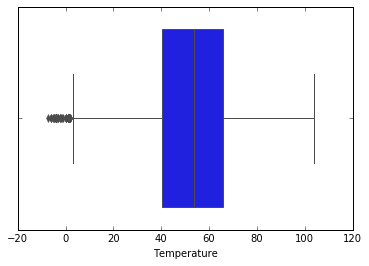

In [142]:
# Boxplot to find the outliers in the Temp column
sb.boxplot(data['Temperature'])

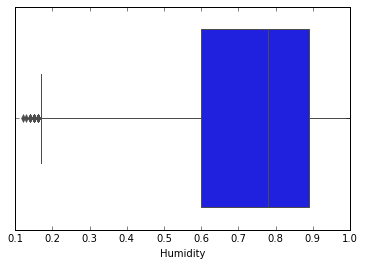

In [143]:
# Boxplot to find the outliers in the Temp column
sb.boxplot(data['Humidity'])

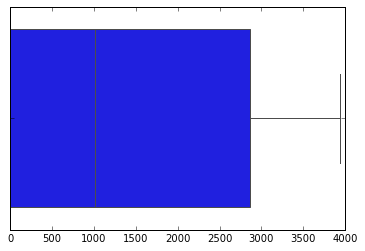

In [158]:
# Remove the outlier from the whole dataset
def remove_outlier(data):
    low = .20
    high = .80
    quant_df = data.quantile([low, high])
    for name in list(data.columns):
#         if is_numeric_dtype(data[name]):
        data = data[(data[name] > quant_df.loc[low, name]) & (data[name] < quant_df.loc[high, name])]
    return data

data = remove_outlier(data)
sb.boxplot(data)

(array([  882.,  1162.,  1703.,  1067.,   639.,  1975.,  1484.,   702.,
         1940.,  1273.]),
 array([ 0.4624 ,  0.48841,  0.51442,  0.54043,  0.56644,  0.59245,
         0.61846,  0.64447,  0.67048,  0.69649,  0.7225 ]),
 <a list of 10 Patch objects>)

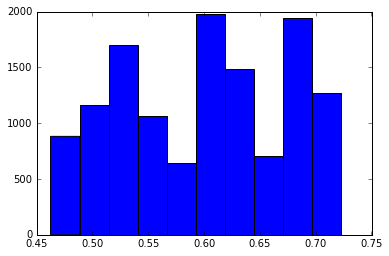

In [159]:
# Histrogram of the feature varibale
plt.hist(data['Humidity'])

/home/admin1/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


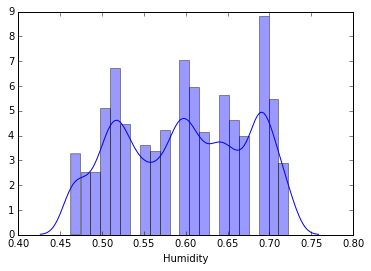

In [160]:
# Distplot of the feature varibale
sb.distplot(data['Humidity'])

In [161]:
# Mean and median of the Humidity column 
print("Mean is", data['Humidity'].mean(), data['Humidity'].skew(), ", Median is ", data['Humidity'].median())

Mean is 0.5975490293911472 -0.0751859400988 , Median is  0.5929


Skewness is 0.0791713275726
0.36276789654792907 0.35153040999999996


/home/admin1/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


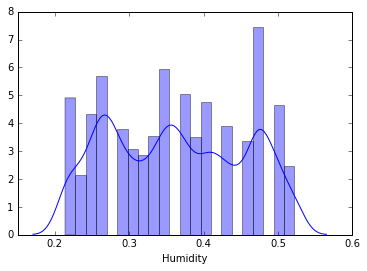

In [162]:
# now transforming feature variable
target = (np.square((data['Humidity'])))
print ('Skewness is', target.skew())
sb.distplot(target)
print(target.mean(), target.median())
data['Humidity'] = target

(array([ 2089.,  1390.,  1345.,  1249.,  1407.,  1437.,  1144.,  1105.,
         1016.,   645.]),
 array([ 2009.7289 ,  2202.38677,  2395.04464,  2587.70251,  2780.36038,
         2973.01825,  3165.67612,  3358.33399,  3550.99186,  3743.64973,
         3936.3076 ]),
 <a list of 10 Patch objects>)

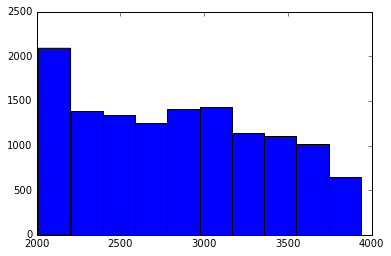

In [163]:
# Histrogram of the target varibale
plt.hist(data['Temperature'])

/home/admin1/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


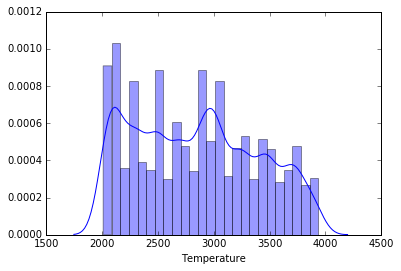

In [164]:
# Distplot of the feature varibale
sb.distplot(data['Temperature'])

In [165]:
print("Mean is", data['Temperature'].mean(), ", Median is ", data['Temperature'].median(), data['Temperature'].skew())

Mean is 2842.8051222421523 , Median is  2859.040899999999 0.195425532626


Skewness is 0.447013579497
8382874.86490477 8174114.867872804


/home/admin1/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


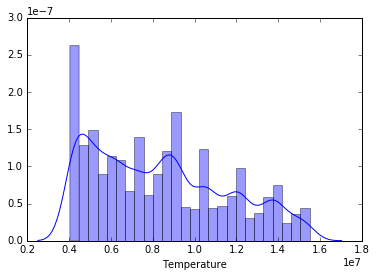

In [166]:
# now transforming feature variable
target = (np.square((data['Temperature'])))
print ('Skewness is', target.skew())
sb.distplot(target)
print(target.mean(), target.median())
data['Temperature'] = target

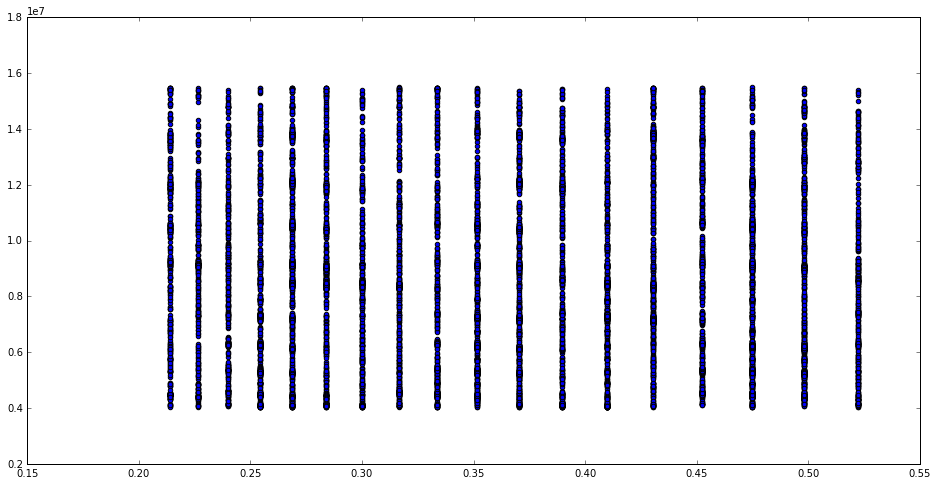

In [167]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['Humidity'], data['Temperature'])
plt.show()

In [168]:
class LinearRegression:

    def __init__(self):
        self.alpha = 0.001
        self.echops = 1500

    def gradient_descent(self, x_train_data, y_train_data, theta0 = 1, theta1 = 0):
        N = len(y_train_data)

        for i in range(self.echops):
            y_curr_data = (theta0 * x_train_data) + theta1

            cost = sum([data ** 2 for data in (y_train_data - y_curr_data)]) / N

            intercept_grad = (-2 / N) * sum(y_train_data - y_curr_data)
            slope_grad = (-2 / N) * sum(x_train_data * (y_train_data - y_curr_data))

            theta0 -= self.alpha * slope_grad
            theta1 -= self.alpha * intercept_grad

        return theta0, theta1, cost

    def test(self, x_test_data, theta0, theta1):
         y_pred = np.array([])
         for i in range(len(x_test_data)):
             y_pred_val = theta0 + theta1 * x_test_data[i]
             y_pred = np.append(y_pred, y_pred_val)

         return y_pred

    def accuracy(self, y_test_data, y_pred):
         total_error = 0
         for i in range(len(y_test_data)):
             total_error += (abs((y_pred[i] - y_test_data[i]) / y_test_data[i]))

         total_error = total_error / len(y_test_data)
         accuracy = (1 - total_error) * 100

         return accuracy

    def feature_scaling(self, x_data):
        result = np.array([])
        for i in range(len(x_data)):
            x_std = (x_data[i] - np.mean(x_data)) / np.std(x_data)
            result = np.append(x_std, result)
        return result


def main():
    lr = LinearRegression()

    
    train_size = int(np.ceil((len(data) * 0.8)))
    test_size = int(len(data) - train_size)
    
    x_train_data = np.array(data["Humidity"][:train_size])
    y_train_data = np.array(data["Temperature"][:train_size])
    
    x_test_data = np.array(data["Humidity"][train_size:])
    y_test_data = np.array(data["Temperature"][train_size:])

    
    theta_0_arr, theta_1_arr, cost_arr = lr.gradient_descent(x_train_data, y_train_data)
    print(theta_0_arr, theta_1_arr)
    
    y_pred = lr.test(x_test_data, theta_0_arr, theta_1_arr)
    
    accuracy = lr.accuracy(y_test_data, y_pred)
    print("Accuracy is ", accuracy)

if __name__ == '__main__':
    main()

2544924.0964 7245022.14383
Accuracy is  65.8949847291
